In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d # used for 3 Dimensional plotting
from matplotlib import cm # Different style of plotting 

For AND operator


[]

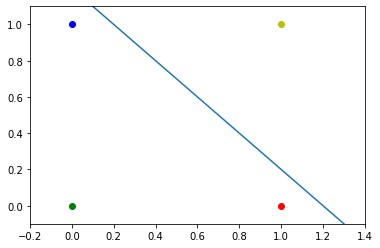

In [17]:
print("For AND operator")
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="g")
ax.scatter(0, 1, color="b")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="y")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m, c = -1, 1.2
ax.plot(X, m * X + c )
plt.plot()

In [18]:
y = ([0,0],[0,1],[1,0],[1,1])
for item in y:
    print(item)

[0, 0]
[0, 1]
[1, 0]
[1, 1]


In [19]:
def thresholdFunc(output):
    if output < 0:
        output = 0
    if output > 1:
        output = 1
    return output

In [20]:
w1 = 1
w2 = 1
b = -1
for item in y:
    x1 = item[0]
    x2 = item[1]
    output = w1*x1+w2*x2+b
    output = thresholdFunc(output)
    print(str(item)+" "+str(output))

[0, 0] 0
[0, 1] 0
[1, 0] 0
[1, 1] 1


In [21]:
w1 = 2
w2 = 2
b = -1
for item in y:
    x1 = item[0]
    x2 = item[1]
    output = w1*x1+w2*x2+b
    output = thresholdFunc(output)
    print(str(item)+" "+str(output))

[0, 0] 0
[0, 1] 1
[1, 0] 1
[1, 1] 1


In [22]:
#AND operator

def Cross_Entropy(y_hat, y):
    # There are 2 possibilities: either 0 or 1
    # np.log() is actually the natural logarithm with e, for its base
    if y == 1:
      return -np.log(y_hat)
    else:
      return -np.log(1 - y_hat)

# This is just the classic sigmoid function, given input z
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [23]:
def derivative_Cross_Entropy(y_hat, y):
    # Again we account for 2 possibilities of y=0/1
    if y == 1:
      return -1/y_hat
    else:
      return 1 / (1 - y_hat)
# The derivative of sigmoid is quite straight-forward
def derivative_sigmoid(x):
    return x*(1-x)

In [24]:

# Input data
X = np.array([[0, 0], [0, 5], [5, 0], [5, 5]])
# Actual Output (i.e., what AND returns and our perceptron should learn to produce)
Y = np.array([0, 0, 0, 1])

In [25]:

# Considering a low and high range for our random weight generation
# considering the range to be small, so that during the back-propagation so that gradients through the sigmoid unit will stay strong. This is a major concern in

low = -0.01
high = 0.01

# using uniform distribution for our random weight generation.
W_2 = np.random.uniform(low=low, high=high, size=(1,))
W_1 = np.random.uniform(low=low, high=high, size=(1,))
W_0 = np.random.uniform(low=low, high=high, size=(1,))


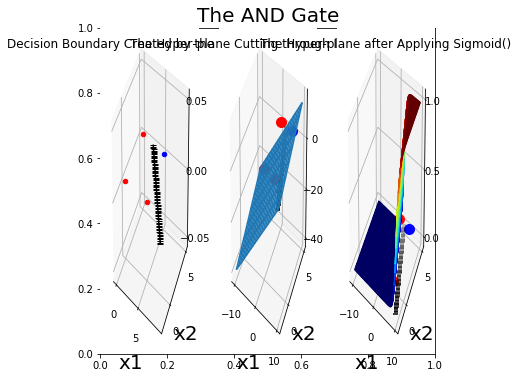

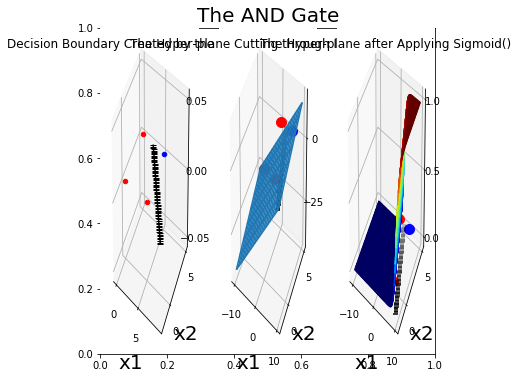

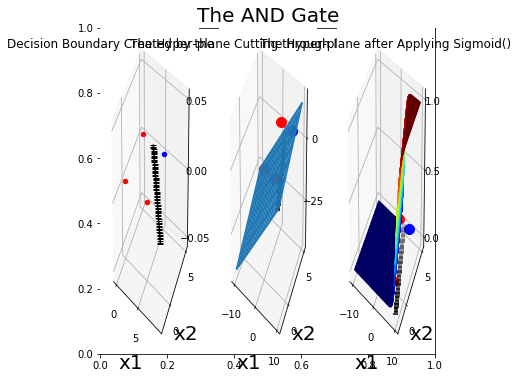

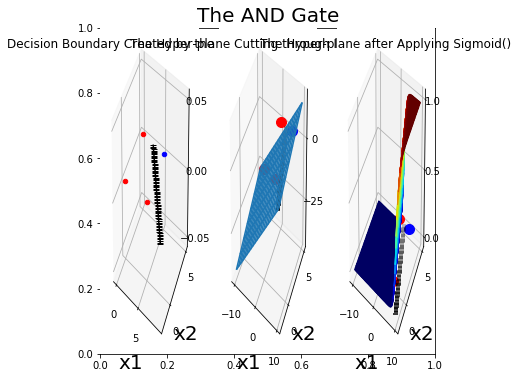

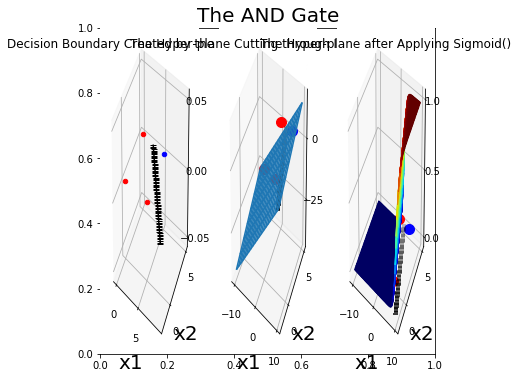

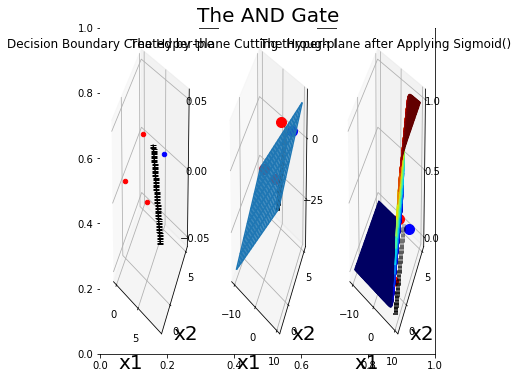

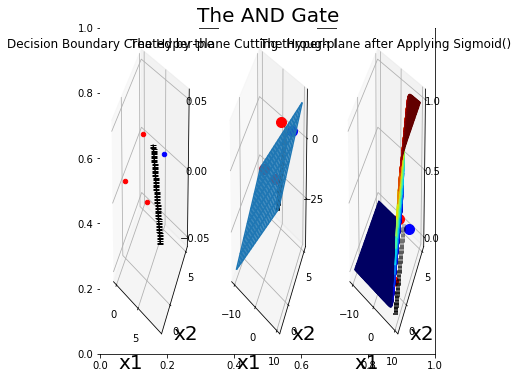

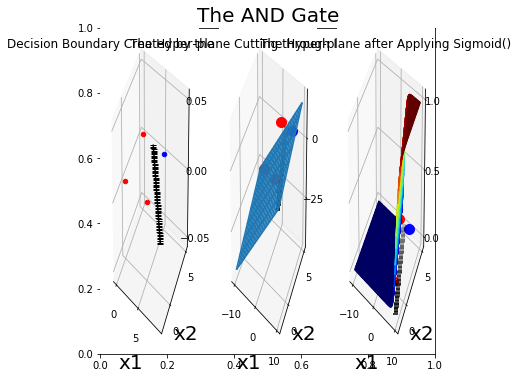

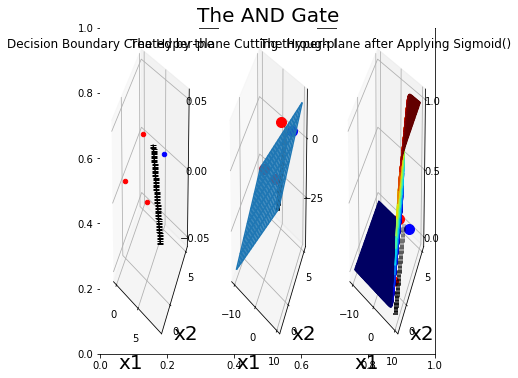

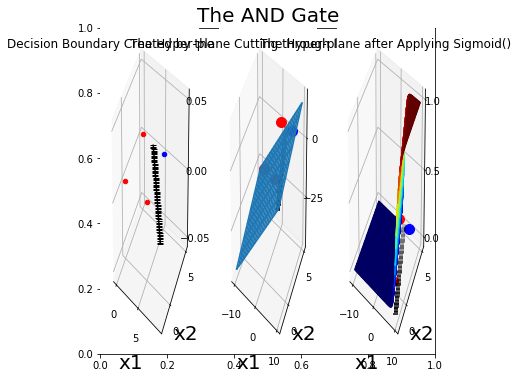

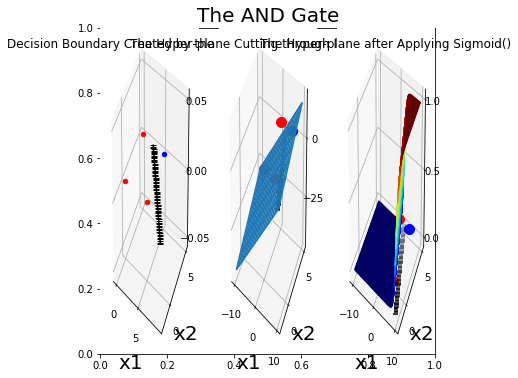

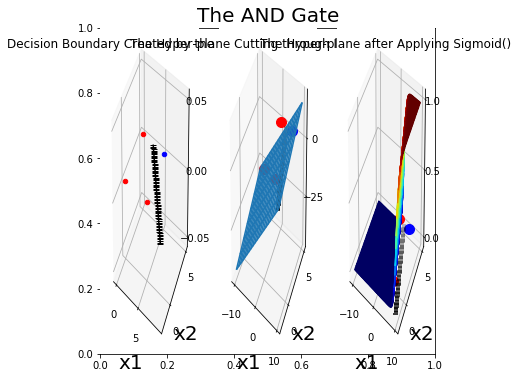

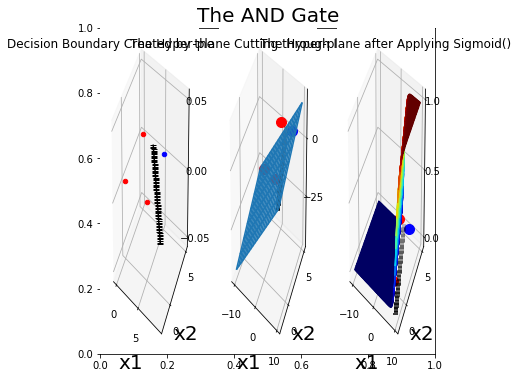

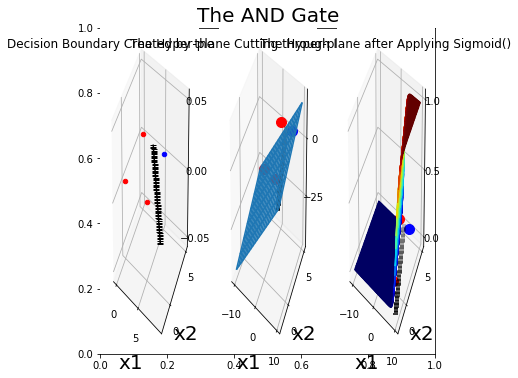

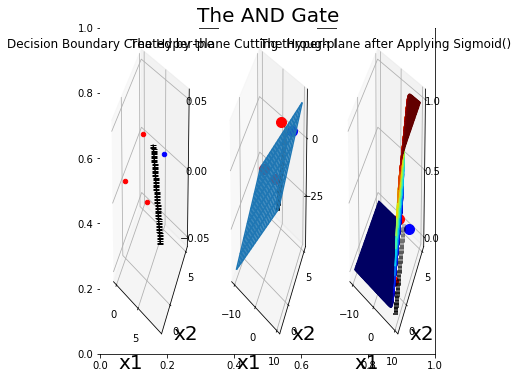

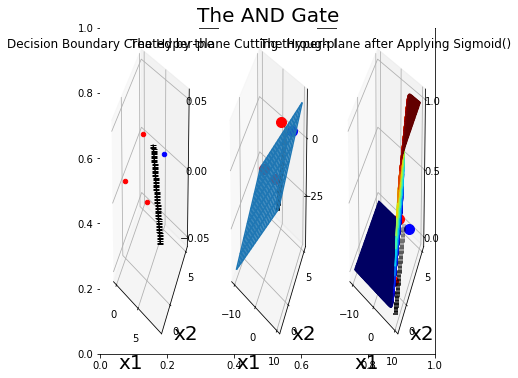

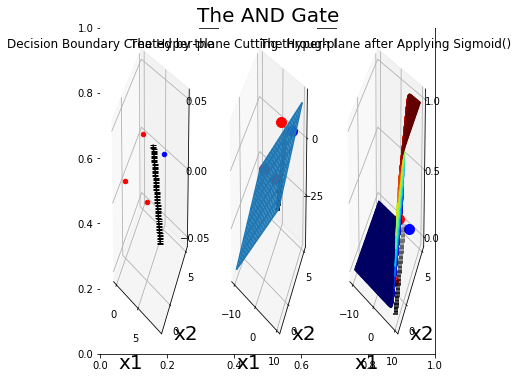

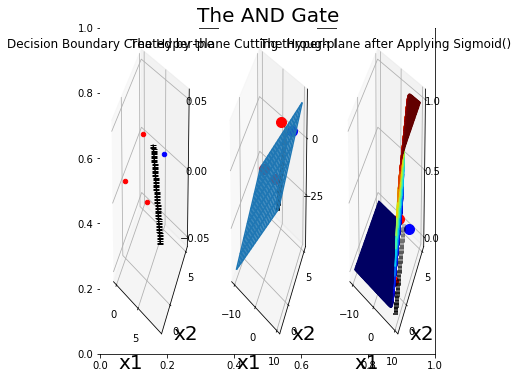

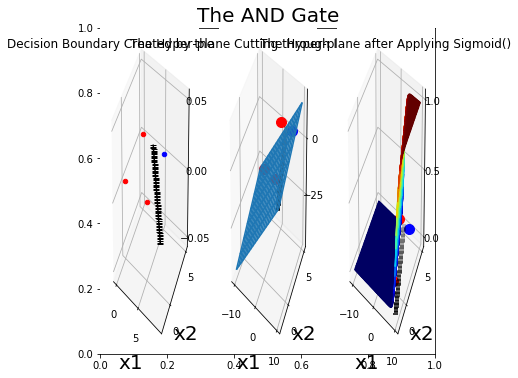

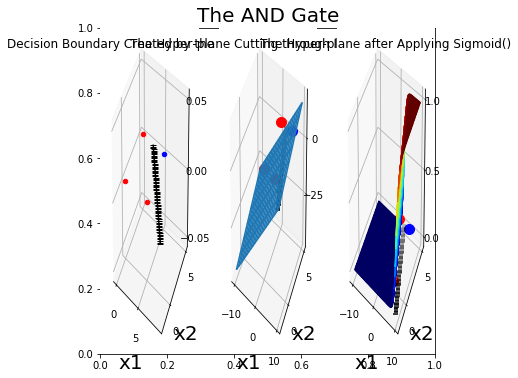

In [29]:

# Number of our epochs. Every epoch is a complete sweep through our data
Epoch = 10000

# The learning rate
eta = 0.05

# E will contain the average cross-entropy error per epoch
E = []

# Training the model.
for ep in range(Epoch):
    
    # Shuffling the train_data X and its Labels Y
    random_index = np.arange(X.shape[0])
    
    # Assigning random_index has the same length as X and Y
    np.random.shuffle(random_index)
    
    # e will record errors in an epoch. Then will be averaged, and this average value will be added to E.
    # We reset e[], in the beginning of each epoch
    e = []
    # This loop goes through the shuffled training data. random_index makes sure for training data in X we are grabbing the correct ground truth from Y
    for i in random_index:
        # Grab the ith training data from X
        x = X[i]
        # Compute Z, which is the input to our sigmoidal unit
        Z = W_1* x[0] + W_2* x[1] + W_0
        # Apply sigmoid, to produce an output by the perceptron
        Y_hat = sigmoid(Z)
        # Compute the binary cross-entropy error for this ith data point and add it to e[]
        e.append(Cross_Entropy(Y_hat, Y[i]))
        # Compute the gradients of our error function in all 3 learnable parameters (i.e., the weights of our network)
        dEdW_1 = derivative_Cross_Entropy(Y_hat, Y[i])*derivative_sigmoid(Y_hat)*x[0]
        dEdW_2 = derivative_Cross_Entropy(Y_hat, Y[i]) * derivative_sigmoid(Y_hat) * x[1]
        dEdW_0 = derivative_Cross_Entropy(Y_hat, Y[i])*derivative_sigmoid(Y_hat)
        
        # Update the parameters using the computed gradients
        W_0 = W_0 - eta * dEdW_0
        W_1 = W_1 - eta*dEdW_1
        W_2 = W_2 - eta* dEdW_2
#Every 500 epochs, we would like to visualise 3 things: 
 #The linear 2-Dimensional decision boundary in the input space.
#The actual hyper-plane in the 3-Dimensional space, which by cutting through the input space, has produced our linear decision boundary, which is the same as our Z (i.e., the input to our sigmoidal unit).
#Finally, the sigmoid() of this Z, which should squash the hyper-plane between 0 and 1, by definition
    if ep % 500 == 0:
        # Generate a figure
        fig = plt.figure(figsize=(6, 6))
        plt.title('The AND Gate', fontsize=20)
        # Insert a sub-figure and make sure it is capable of 3-Dimensional rendering
        ax = fig.add_subplot(131, projection='3d')
        # Plot individual data points in this sub-figure
        ax.scatter(0, 0,c='r', label="Class 0")
        ax.scatter(0, 5,c='r', label="Class 0")
        ax.scatter(5, 0,c='r', label="Class 0")
        ax.scatter(5, 5,c='b', label="Class 1")
        # Give a title to this sub-figure
        plt.title('Decision Boundary Created by the Hyper-plane')
        
        x_1 = np.arange(-2, 5, 0.1)
        W_1 * x[0] + W_2 * x[1] + W_0
        x_2 = (-W_1/W_2) * x_1 - (W_0/W_2)
        plt.grid()
        plt.plot(x_2, x_1, '-k', marker='_', label="DB")
        plt.xlabel('x1', fontsize=20)
        plt.ylabel('x2', fontsize=20)
        # Now we add the second sub-figure. This well wisualize the hyper-plane X and the way it cuts through the input space
        ax = fig.add_subplot(132, projection='3d')
        x_0 = np.arange(-10, 10, 0.1)
        # we need a mesh-grid for 3-Dimensional plotting
        X_0, X_1 = np.meshgrid(x_0, x_1)
        # for every combination of points from X_0 and X_1, we generate a value for Z in 3-Dimensions
        Z = X_0*W_1 + X_1*W_2 + W_0
        # We use the wire_frame package so we could see behind this hyper-plane. The stride arguements, 
        # determine the grid-size on this plane. The smaller their values, the finer the grid on the hyper-plane
        ax.plot_wireframe(X_0, X_1, Z, rstride=10, cstride=10)
        # We still want to visualize the linear decision boundary computed in the previous sub-figure
        ax.scatter(x_2, x_1, 0, marker='_', c='k')
        # Again plot our data points as well for this sub-figure
        ax.scatter(0, 0, 0, marker='o', c='r', s=100)
        ax.scatter(0, 5, 0, marker='o', c='r', s=100)
        ax.scatter(5, 0, 0, marker='o', c='r', s=100)
        ax.scatter(5, 5, 0, marker='o', c='b', s=100)
        plt.xlabel('x1', fontsize=20)
        plt.ylabel('x2', fontsize=20)
        plt.title('The Hyper-plane Cutting through Input Space')
        plt.grid()
        # Add the last sub-figure that will show the power of sigmoid(), and highlights how Z gets squashed between 0 and 1
        ax = fig.add_subplot(133, projection='3d')
       
        my_col = cm.jet(sigmoid(Z) / np.amax(sigmoid(Z)))
        ax.plot_surface(X_0, X_1, sigmoid(Z), facecolors=my_col)
        # Again we want to see the linear decision boundary produced in the first sub-figure with our actual training examples
        ax.scatter(x_2, x_1, 0, marker='_', c='k')
        ax.scatter(0, 0, 0, marker='o', c='r', s=100)
        ax.scatter(0, 5, 0, marker='o', c='r', s=100)
        ax.scatter(5, 0, 0, marker='o', c='r', s=100)
        ax.scatter(5, 5, 0, marker='o', c='b', s=100)
        plt.title('The Hyper-plane after Applying Sigmoid()')
        plt.xlabel('x1', fontsize=20)
        plt.ylabel('x2', fontsize=20)
        plt.grid()
        plt.show()
    # Now e has the errors for every training example in our training set through out the current epoch. We average that and add it to E[]
    E.append(np.mean(e))


In [8]:
#For "OR" Operator
input_features = np.array([[0,0],[0,1],[1,0],[1,1]])
print (input_features.shape)
print (input_features)

# Define target output:
target_output = np.array([[0,1,1,1]])

# Reshaping our target output into vector:
target_output = target_output.reshape(4,1)
print(target_output.shape)
print (target_output)

# Define weights:
weights = np.array([[0.1],[0.2]])
print(weights.shape)
print (weights)

# Bias weight:
bias = 0.3

# Learning Rate:
lr = 0.05

# Sigmoid function:
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Derivative of sigmoid function:
def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

# Main logic for neural network:
# Running our code 10000 times:for epoch in range(10000):
inputs = input_features

#Feedforward input:
in_o = np.dot(inputs, weights) + bias 

#Feedforward output:
out_o = sigmoid(in_o) 

#Backpropogation

#Calculating error
error = out_o - target_output

#Going with the formula:
x = error.sum()
print(x)

#Calculating derivative:
derror_douto = error
douto_dino = sigmoid_der(out_o)

#Multiplying individual derivatives:
deriv = derror_douto * douto_dino 

#Multiplying with the 3rd individual derivative:

#Finding the transpose of input_features:
inputs = input_features.T
deriv_final = np.dot(inputs,deriv)

#Updating the weights values:
weights -= lr * deriv_final 

#Updating the bias weight value:
for i in deriv:
    bias -= lr * i 

    #Check the final values for weight and biasprint (weights)
print("Bias=")
print (bias) 
print("\n")

#Taking inputs:
single_point = np.array([1,0]) 

#1st step:
result1 = np.dot(single_point, weights) + bias 

#2nd step:
result2 = sigmoid(result1) 

#Print final result
print("result[1,0]=")
print(result2)
print("\n")

#Taking inputs:
single_point = np.array([0,1]) 

#1st step:
result1 = np.dot(single_point, weights) + bias 

#2nd step:
result2 = sigmoid(result1) 

#Print final result
print("result[0,1]=")
print(result2)
print("\n")

#Taking inputs:
single_point = np.array([1,1])

#1st step:
result1 = np.dot(single_point, weights) + bias 

#2nd step:
result2 = sigmoid(result1)

#Print final result
print("result[1,1]=")
print(result2) 
print("\n")

#Taking inputs:
single_point = np.array([0,0]) 

#1st step:
result1 = np.dot(single_point, weights) + bias 

#2nd step:
result2 = sigmoid(result1) 

#Print final result
print("result[0,0]=")
print(result2)
print("\n")

(4, 2)
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
(4, 1)
[[0]
 [1]
 [1]
 [1]]
(2, 1)
[[0.1]
 [0.2]]
-0.558754185648239
Bias=
[0.30626124]


result[1,0]=
[0.60225064]


result[0,1]=
[0.62587233]


result[1,1]=
[0.65093229]


result[0,0]=
[0.57597241]




In [9]:
print("we can concur that the predicted output is very close to 0")


we can concur that the predicted output is very close to 0


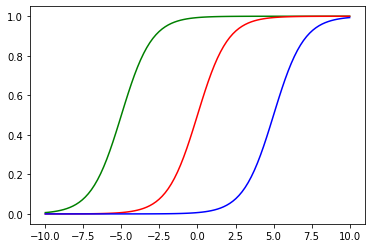

In [10]:
#Generating input dataset
#generating 100 points between -10 and 10
input=np.linspace(-10,10,100)

#defining sigmoid func
def sigmoid(X):
    value =1/(1+np.exp(-X))
    return value

#output values
output= sigmoid(input+5)
plt.plot(input,output,c="g")

#shifting the graph to left:
output= sigmoid(input)
plt.plot(input,output,c="r")

#shifting the graph to right
output= sigmoid(input-5)
plt.plot(input,output,c="b")

In [41]:
def relu(x) :
    return max(x, 0)

def der_relu(x):
    if x <= 0 :
        return 0
    if x > 0 :
        return 1

def sigmoids(z):
    s = 1 / (1 * np.exp(-z))
    ds = s*(1-s)
    return s, ds

def tanh(x):
    t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    dt=1-t**2
    return t,dt

In [42]:
x= np.arange(-4,4,0.01)

C:\Users\Priyanshi Chakrabort\Anaconda 3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


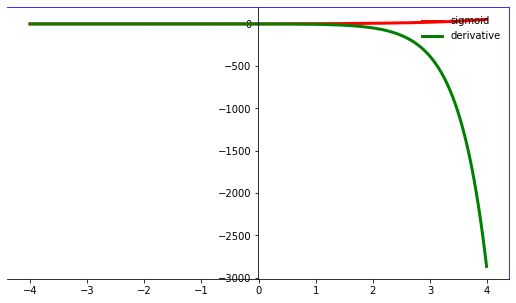

In [45]:
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('b')
ax.spines['top'].set_color('b')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(x,sigmoids(x)[0], color="r", linewidth=3, label="sigmoid")
ax.plot(x,sigmoids(x)[1], color="g", linewidth=3, label="derivative")
ax.legend(loc="upper right", frameon=False)
fig.show()

C:\Users\Priyanshi Chakrabort\Anaconda 3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


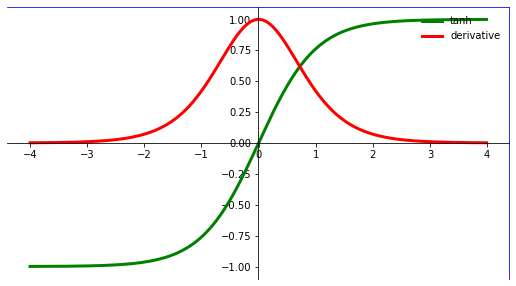

In [47]:
# Setup centered axes
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('b')
ax.spines['top'].set_color('b')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(x,tanh(x)[0], color="g", linewidth=3, label="tanh")
ax.plot(x,tanh(x)[1], color="r", linewidth=3, label="derivative")
ax.legend(loc="upper right", frameon=False)
fig.show()

C:\Users\Priyanshi Chakrabort\Anaconda 3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


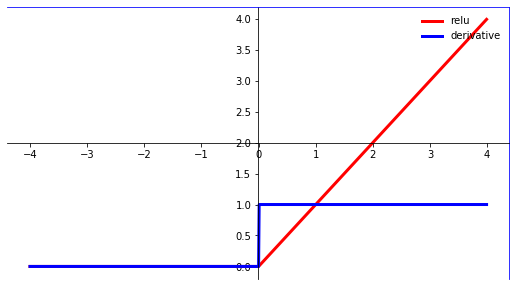

In [48]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('b')
ax.spines['top'].set_color('b')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
# Create and show plot
ax.plot(x,list(map(lambda x: relu(x),x)), color="r", linewidth=3, label="relu")
ax.plot(x,list(map(lambda x: der_relu(x),x)), color="b", linewidth=3, label="derivative")
ax.legend(loc="upper right", frameon=False)
fig.show()